<h2>EDA - Análisis exploratorio de los datos sobre taxis en Nueva York</h2>

<h3>Contexto</h3>

<p style="font-size:16px;">Los servicios de transporte en Nueva York, como los taxis y Uber, han revolucionado la movilidad urbana. Estas alternativas ofrecen una forma conveniente y accesible de desplazarse, transformando la percepción sobre el transporte público y el alquiler de coches.</p>

<p style="font-size:16px;">El problema del cambio climático, provocado en gran medida por el uso de energías provenientes de combustibles fósiles en los vehículos, ha alcanzado niveles críticos. Las compañías se ven instadas a actuar frente a estos desafíos ambientales, lo que implica la necesidad de medir y mejorar los niveles de consumo y generación energética. Esta conciencia conduce a la búsqueda de soluciones para mitigar dicho impacto en el medio ambiente. </p>

<h3>Objetivos</h3>

<p style="font-size:16px;">El objetivo es realizar un EDA (Análisis exploratorio de los datos) para poder encontrar relaciones en los datos que nos permitan realizar un análisis profundo y encontrar posibles causas y conclusiones a la hora de abordar la problemática de los taxis en Nueva York.</p>

<p style="font-size:16px;">En este EDA abordaremos:</p>

<ul>
  <li>Posibles valores nulos</li>
  <li>Posibles registros duplicados</li>
  <li>Posibles valores outliers</li>
  <li>Gráficos representativos con su correspondiente análisis</li>
  <li>Conclusiones</li>
</ul>

<p style="font-size:17px;"><u>Importo las librerías a utilizar</u> </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<p style="font-size:17px;"><u>Lectura de los datos disponibles</u></p>


<p style="font-size:15px;">Observo los datos y columnas del dataset de los taxis amarillos</p>

In [3]:
df_yellow_taxis = pd.read_parquet('Datasets/yellow_taxis.parquet')

df_yellow_taxis.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [10]:
df_yellow_taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

<p style="font-size:15px;">Observo los datos y columnas del dataset de los taxis verdes</p>

In [25]:
df_green_taxis = pd.read_parquet('Datasets/green_taxis.parquet')

df_green_taxis.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [12]:
df_green_taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

<p style="font-size:15px;">Observo los datos y columnas del dataset de localizaciones</p>

In [26]:
df_localizaciones = pd.read_parquet('Datasets/localizaciones.parquet')

df_localizaciones.head()

,LocationID,Borough,Zone,service_zone,Shape_Leng,Shape_Area
0,1,EWR,Newark Airport,EWR,0.116357,0.000782
1,2,Queens,Jamaica Bay,Boro Zone,0.433470,0.004866
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,0.084341,0.000314
3,4,Manhattan,Alphabet City,Yellow Zone,0.043567,0.000112
4,5,Staten Island,Arden Heights,Boro Zone,0.092146,0.000498


In [27]:
df_localizaciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationID    263 non-null    int64  
 1   Borough       263 non-null    object 
 2   Zone          263 non-null    object 
 3   service_zone  263 non-null    object 
 4   Shape_Leng    263 non-null    float64
 5   Shape_Area    263 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.4+ KB


<p style="font-size:15px;">Observo los datos y columnas del dataset de emisión y consumo</p>

In [28]:
df_emision_consumo = pd.read_parquet('Datasets/modelos_economia_emision.parquet')

df_emision_consumo.tail()

,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Manufacturer,Fuel,co2,co2TailpipeGpm,fuelCost08,Number of Passengers
710,S90 AWD,2021,NaN,NaN,60.0,28.0,31.0,30.0,Volvo,Plug-in Hybrid Electric,356.0,356.0,2600.0,None
711,XC60 AWD,2021,NaN,NaN,57.0,26.0,28.0,27.0,Volvo,Plug-in Hybrid Electric,375.0,375.0,2700.0,None
712,XC60 AWD,2021,NaN,NaN,57.0,26.0,28.0,27.0,Volvo,Plug-in Hybrid Electric,386.0,386.0,2850.0,None
713,XC90 AWD,2021,NaN,NaN,55.0,26.0,28.0,27.0,Volvo,Plug-in Hybrid Electric,394.0,394.0,2950.0,None
714,XC90 AWD,2021,NaN,NaN,55.0,26.0,28.0,27.0,Volvo,Plug-in Hybrid Electric,380.0,380.0,2850.0,None


In [29]:
df_emision_consumo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 714
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               715 non-null    object 
 1   Model Year                          715 non-null    int64  
 2   Alternative Fuel Economy City       161 non-null    float64
 3   Alternative Fuel Economy Highway    161 non-null    float64
 4   Alternative Fuel Economy Combined   227 non-null    float64
 5   Conventional Fuel Economy City      646 non-null    float64
 6   Conventional Fuel Economy Highway   646 non-null    float64
 7   Conventional Fuel Economy Combined  646 non-null    float64
 8   Manufacturer                        715 non-null    object 
 9   Fuel                                715 non-null    object 
 10  co2                                 715 non-null    float64
 11  co2TailpipeGpm                      715 non-null  

<p style="font-size:15px;">Observo los datos y columnas del dataset de características</p>

In [30]:
df_caracteristicas = pd.read_parquet('Datasets/modelos_caracteristicas.parquet')

df_caracteristicas.tail()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge_x,PowerTrain_x,PlugType_x,BodyStyle_x,Segment_x,Seats_x,PriceEuro_x
100,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
101,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
102,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
103,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
104,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


<p style="font-size:18px;"><u>Verificación de la existencia de valores nulos</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de taxis amarillos</p>

In [31]:
df_yellow_taxis.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

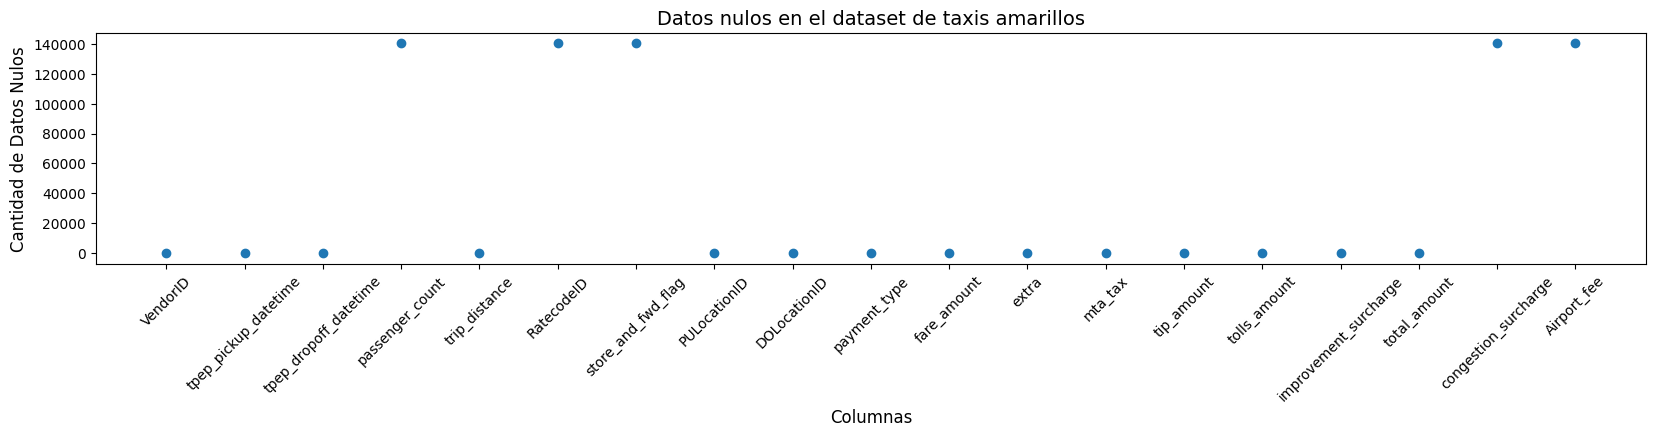

In [32]:
yellow_nulos = df_yellow_taxis.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(yellow_nulos.index, yellow_nulos.values)
plt.title('Datos nulos en el dataset de taxis amarillos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:15px;">Borro los registros con datos nulos</p>

In [33]:
df_yellow_taxis_cleaned = df_yellow_taxis.dropna(subset=['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'Airport_fee'])


In [34]:
df_yellow_taxis_cleaned.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de taxis verdes</p>

In [35]:
df_green_taxis.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        3415
RatecodeID                3415
PULocationID                 0
DOLocationID                 0
passenger_count           3415
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                56551
improvement_surcharge        0
total_amount                 0
payment_type              3415
trip_type                 3418
congestion_surcharge      3415
dtype: int64

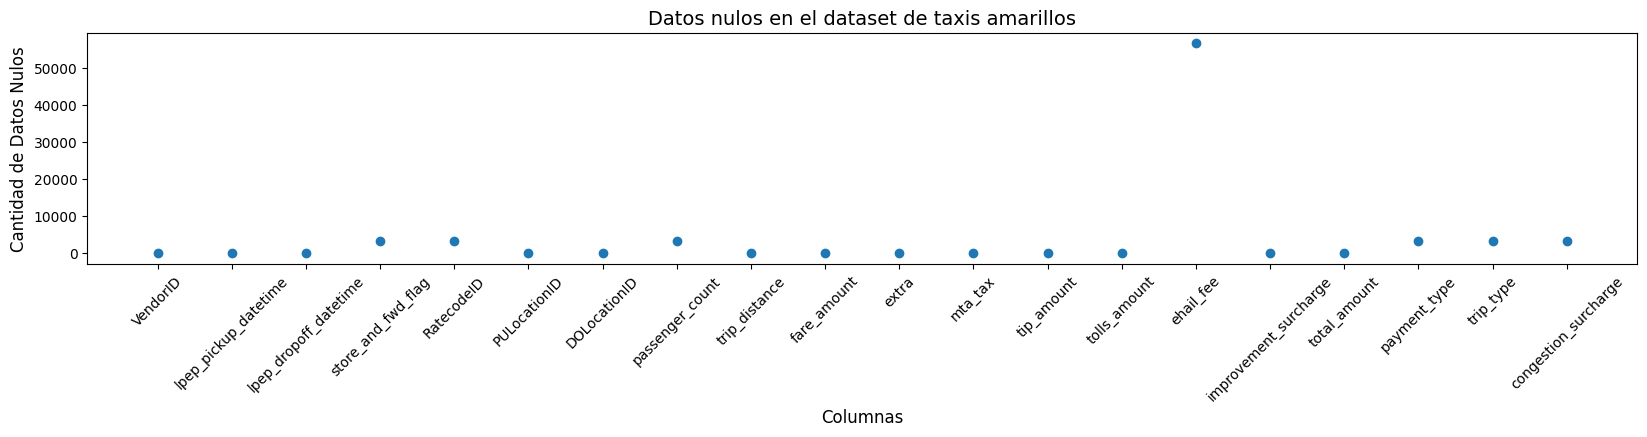

In [36]:
green_nulos = df_green_taxis.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(green_nulos.index, green_nulos.values)
plt.title('Datos nulos en el dataset de taxis amarillos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:15px;">Borro los registros con datos nulos</p>

In [37]:
df_green_taxis_cleaned = df_green_taxis.dropna(subset=['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 'payment_type', 'trip_type', 'congestion_surcharge'])

In [38]:
df_green_taxis_cleaned.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de localizaciones</p>

In [39]:
df_localizaciones.isnull().sum()

LocationID      0
Borough         0
Zone            0
service_zone    0
Shape_Leng      0
Shape_Area      0
dtype: int64

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de emision</p>

In [40]:
df_emision_consumo.isnull().sum()

Model                                   0
Model Year                              0
Alternative Fuel Economy City         554
Alternative Fuel Economy Highway      554
Alternative Fuel Economy Combined     488
Conventional Fuel Economy City         69
Conventional Fuel Economy Highway      69
Conventional Fuel Economy Combined     69
Manufacturer                            0
Fuel                                    0
co2                                     0
co2TailpipeGpm                          0
fuelCost08                              0
Number of Passengers                  715
dtype: int64

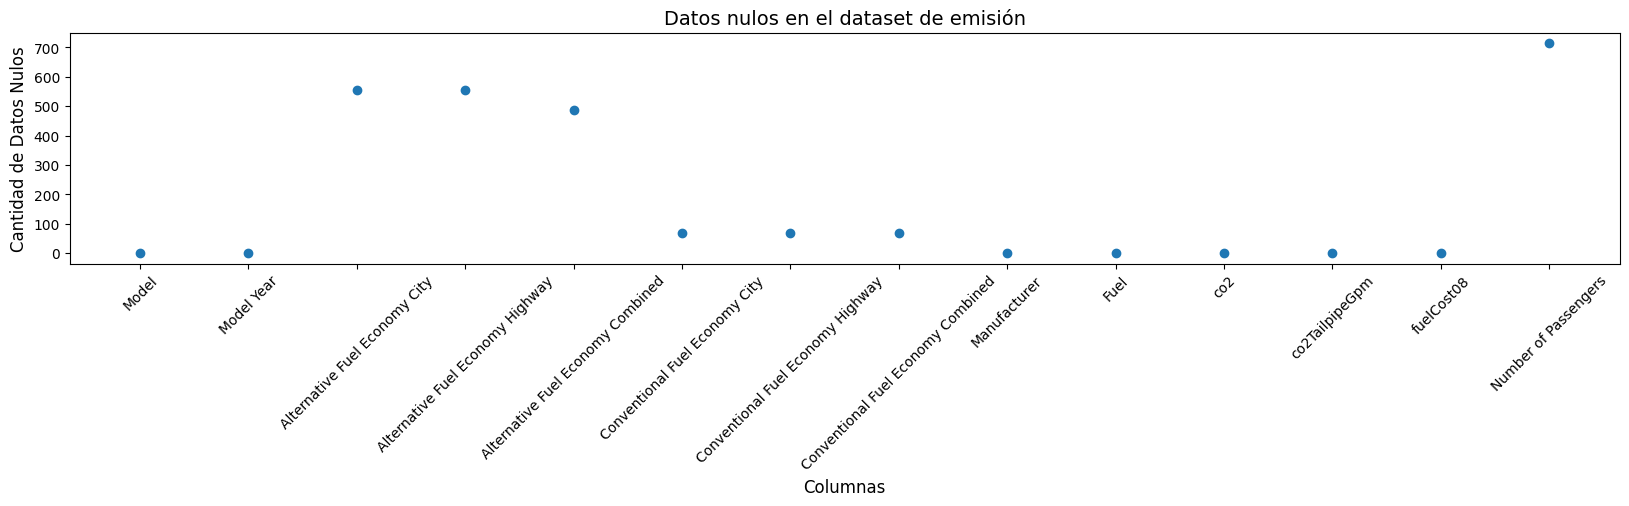

In [41]:
emision_nulos = df_emision_consumo.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(emision_nulos.index, emision_nulos.values)
plt.title('Datos nulos en el dataset de emisión', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:15px;">Borro los registros con datos nulos</p>

In [42]:
df_emision_cleaned = df_emision_consumo.dropna(subset=['Alternative Fuel Economy City','Alternative Fuel Economy Highway','Alternative Fuel Economy Combined', 'Conventional Fuel Economy City','Conventional Fuel Economy Highway', 'Conventional Fuel Economy Combined', 'Number of Passengers'  ])

In [21]:
df_emision_cleaned.isnull().sum()

Model                                 0
Model Year                            0
Alternative Fuel Economy City         0
Alternative Fuel Economy Highway      0
Alternative Fuel Economy Combined     0
Conventional Fuel Economy City        0
Conventional Fuel Economy Highway     0
Conventional Fuel Economy Combined    0
Manufacturer                          0
Fuel                                  0
co2                                   0
co2TailpipeGpm                        0
fuelCost08                            0
Number of Passengers                  0
dtype: int64

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de características</p>

In [22]:
df_caracteristicas.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge_x      0
PowerTrain_x       0
PlugType_x         0
BodyStyle_x        0
Segment_x          0
Seats_x            0
PriceEuro_x        0
dtype: int64

<p style="font-size:18px;"><u>Valores outliers</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores outliers mediante el Método del Rango Intercuartil (IQR)</p>
<p style="font-size:15px;">El método IQR es una técnica común para detectar outliers. Los valores que caen por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR son considerados outliers.</p>

In [43]:
def detectar_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers_yellow_taxis = detectar_outliers_iqr(df_yellow_taxis_cleaned)
print("Outliers en 'df_yellow_taxis_cleaned':")
for column, outliers in outliers_yellow_taxis.items():
    print(f"{column}: {len(outliers)} outliers")


outliers_green_taxis = detectar_outliers_iqr(df_green_taxis_cleaned)
print("\nOutliers en 'df_green_taxis_cleaned':")
for column, outliers in outliers_green_taxis.items():
    print(f"{column}: {len(outliers)} outliers")

outliers_caracteristicas = detectar_outliers_iqr(df_caracteristicas)
print("\nOutliers en 'df_caracteristicas':")
for column, outliers in outliers_caracteristicas.items():
    print(f"{column}: {len(outliers)} outliers")

outliers_localizaciones = detectar_outliers_iqr(df_localizaciones)
print("\nOutliers en 'df_localizaciones':")
for column, outliers in outliers_localizaciones.items():
    print(f"{column}: {len(outliers)} outliers")

outliers_emision = detectar_outliers_iqr(df_emision_cleaned)
print("\nOutliers en 'df_emision_cleaned':")
for column, outliers in outliers_emision.items():
    print(f"{column}: {len(outliers)} outliers")

Outliers en 'df_yellow_taxis_cleaned':
passenger_count: 635723 outliers
trip_distance: 367494 outliers
RatecodeID: 161112 outliers
payment_type: 505416 outliers
fare_amount: 325723 outliers
extra: 46983 outliers
mta_tax: 63434 outliers
tip_amount: 207349 outliers
tolls_amount: 204385 outliers
improvement_surcharge: 36502 outliers
total_amount: 353194 outliers
congestion_surcharge: 246707 outliers
Airport_fee: 237673 outliers

Outliers en 'df_green_taxis_cleaned':
RatecodeID: 0 outliers
passenger_count: 0 outliers
trip_distance: 0 outliers
fare_amount: 0 outliers
extra: 0 outliers
mta_tax: 0 outliers
tip_amount: 0 outliers
tolls_amount: 0 outliers
ehail_fee: 0 outliers
improvement_surcharge: 0 outliers
total_amount: 0 outliers
payment_type: 0 outliers
trip_type: 0 outliers
congestion_surcharge: 0 outliers

Outliers en 'df_caracteristicas':
AccelSec: 1 outliers
TopSpeed_KmH: 1 outliers
Range_Km: 2 outliers
Efficiency_WhKm: 7 outliers
Seats_x: 32 outliers
PriceEuro_x: 6 outliers

Outliers

<p style="font-size:18px;"><u>Verificación de la existencia de registros duplicados </u> </p>

<p style="font-size:15px;">Busco registros duplicados en los datasets taxis amarillos y verdes</p>

In [13]:
duplicated_yellow_taxis = df_yellow_taxis_cleaned[df_yellow_taxis_cleaned.duplicated()]
duplicated_yellow_taxis

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


In [14]:
duplicated_green_taxis = df_green_taxis_cleaned[df_green_taxis_cleaned.duplicated()]
duplicated_green_taxis

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


<p style="font-size:15px;">Busco registros duplicados en el dataset de localizaciones</p>

In [45]:
duplicated_localizaciones = df_localizaciones[df_localizaciones.duplicated()]
duplicated_localizaciones

,LocationID,Borough,Zone,service_zone,Shape_Leng,Shape_Area


<p style="font-size:15px;">Busco registros duplicados en el dataset de emisiones</p>

In [46]:
duplicated_emisiones = df_emision_cleaned[df_emision_cleaned.duplicated()]
duplicated_emisiones

,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Manufacturer,Fuel,co2,co2TailpipeGpm,fuelCost08,Number of Passengers


<p style="font-size:15px;">Busco registros duplicados en el dataset de características</p>

In [47]:
duplicated_caracteristicas = df_caracteristicas[df_caracteristicas.duplicated()]
duplicated_caracteristicas

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge_x,PowerTrain_x,PlugType_x,BodyStyle_x,Segment_x,Seats_x,PriceEuro_x
46,Kia,e-Soul 64 kWh,7.9,167,365,175,340,Yes,FWD,Type 2 CCS,SUV,B,5,36837
94,Kia,e-Soul 64 kWh,7.9,167,365,175,320,Yes,FWD,Type 2 CCS,SUV,B,5,36837


<p style="font-size:15px;">Borro registros duplicados en el dataset de características</p>

In [48]:
df_caracteristicas_sin_duplicados = df_caracteristicas.drop_duplicates()
df_caracteristicas = df_caracteristicas.drop_duplicates()
